# VSR evolution analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../vsrs/best-for-nca.txt", sep=";")
df["shape"] = df["target.body.shape"].apply(lambda s: s.replace("s.vsr.s.free(s=", "").replace(")", ""))

df = df[["best→fitness→vx", "iterations", "shape", "randomGenerator.seed"]]
df.rename(columns={"best→fitness→vx": "best_vx"}, inplace=True)
df.head()

,best_vx,iterations,shape,randomGenerator.seed
0,0.019828,0,11111-10100,1
1,0.226055,1,11111-10100,1
2,0.226055,2,11111-10100,1
3,0.226055,3,11111-10100,1
4,0.226055,4,11111-10100,1


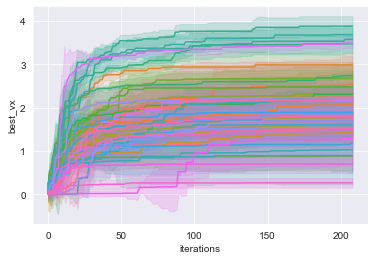

In [3]:
sns.lineplot(data=df, x="iterations", y="best_vx", hue="shape", estimator="median", errorbar="sd")
plt.legend('', frameon=False)
plt.show()

In [20]:
summary = df.groupby(["shape", "iterations"]).median().reset_index()[["shape", "iterations", "best_vx"]]
summary.pivot(index="iterations", columns="shape", values="best_vx").reset_index().to_csv("../pgfplots/evolution.txt",
                                                                                          sep="\t", index=False)